## **Content**
- Objective
- Data Gathering
- Code Preparation
- Raw Data Preparation
- Cleaning Data
- EDA
- Cluster Analysis

# **Objective**
Gustavo just started an e - commerce startup based in Portugal that recently opened an online website to sell their product . Fortunately , Gustavo is launching their website when the covid - 19 hits and making them grow faster than ever . However , Gustavo is still not using targeted marketing which hurts their marketing budget as only a fraction of their user comes back to their website . Gustavo needs your help to increase their marketing conversion rate by doing more targeted marketing using customer segmentation so that it will not hurt their budget .

# **Data Gathering**
The data is provided in [google sheet](https://docs.google.com/spreadsheets/d/1b1u89Klx5x3A0oZsNIBzloLllePP9Anb1AJeZD_DGMk/edit#gid=33043757) 3 Datasets which each:
1.  orders dataset = consists of unique order that have already purchased in Gustavo e-commerce from Sept 2016 to Oct 2018. 
2.  customers dataset = consists of their domicilies data based on zip code, city, and state
3.  payments dataset = consists of order payments data based on payment sequential, payment type, payment installment, and payment value

# **Code Preparation**

Silhouette library link https://drive.google.com/file/d/1TKv_Z6LCwc_C45P9kleFGBfl-8A8nuF_/view?usp=sharing

In [ ]:
!gdown --id '1TKv_Z6LCwc_C45P9kleFGBfl-8A8nuF_'
from silhoutte import silhoutte_analysis

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1TKv_Z6LCwc_C45P9kleFGBfl-8A8nuF_
To: /content/silhoutte.py
100% 4.34k/4.34k [00:00<00:00, 3.78MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

In [ ]:
print(pd.__version__)

1.3.5


# **Raw Data Preparation**

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1b1u89Klx5x3A0oZsNIBzloLllePP9Anb1AJeZD_DGMk/edit#gid=33043757'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
orders = pd.read_csv(sheet_url_trf)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05,2017-03-09 9:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 0:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 0:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 0:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 0:00:00


In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1b1u89Klx5x3A0oZsNIBzloLllePP9Anb1AJeZD_DGMk/edit#gid=1806620335'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
customers = pd.read_csv(sheet_url_trf)
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1b1u89Klx5x3A0oZsNIBzloLllePP9Anb1AJeZD_DGMk/edit#gid=521422621'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
payments = pd.read_csv(sheet_url_trf)
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


# **Cleaning Data**
Cleaning Data:
- irrelevant data
- missing data
- duplicates
- typos
- convert datatype
- outlier
- combine the dataset

### Irrelevant data

Based on the objective business question, 

- from the orders dataframe we only need order purchase date and order_delivered_customer_date columns then we can just drop all another date columns.
- from the customers dataframe we can drop customer_zip_code_prefix column because there's already customer_city column

In [ ]:
df_orders = orders.copy()
df_orders.drop(columns=['order_approved_at',	'order_delivered_carrier_date', 'order_estimated_delivery_date'],inplace=True)
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 0:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54


In [ ]:
df_customers = customers.copy()
df_customers.drop(columns=['customer_zip_code_prefix'],inplace=True)
df_customers

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,canoas,RS


From the payments dataset, we can rearrange the data frame by aggregating the columns in groups by order_id distinct values

In [ ]:
df_payments = payments.groupby(['order_id']).agg({'payment_type': lambda x : ' & '.join(set(x)), 'payment_installments': 'sum', 'payment_value': 'sum'}).reset_index()
df_payments

,order_id,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card,3,218.04
...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,boleto,1,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,boleto,1,386.53
99437,fffce4705a9662cd70adb13d4a31832d,credit_card,3,116.85
99438,fffe18544ffabc95dfada21779c9644f,credit_card,3,64.71


### Missing data

In [ ]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2965
dtype: int64

Let's drop all null values in orders dataframe

In [ ]:
df_orders.dropna(axis=0,inplace=True)

In [ ]:
df_customers.isna().sum()

customer_id           0
customer_unique_id    0
customer_city         0
customer_state        0
dtype: int64

In [ ]:
df_payments.isna().sum()

order_id                0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

There's nothing null values in customers and payments dataframe, so there's nothing value to be removed

### Duplicates

In [ ]:
df_orders[df_orders.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date


In [ ]:
df_customers[df_customers.duplicated()]

,customer_id,customer_unique_id,customer_city,customer_state


In [ ]:
df_payments[df_payments.duplicated()]

,order_id,payment_type,payment_installments,payment_value


There's nothing duplicated values in all dataframes, so there's nothing value to be removed

### Typos

In [ ]:
for i in df_orders.columns:
  unique_data = df_orders[i].value_counts()
  print(unique_data,'\n')

e481f51cbdc54678b7cc49136f2d6af7    1
af3a99830ba4f46c5814e23ed92ef8cc    1
6e1544fdf72a0f33f9d87bc0a3c6aefe    1
fbc17f0f2a2125054d5ac5c22d2d5120    1
9373150545066777b1cd2bc20e93cf8e    1
                                   ..
911caddee9193485ecfacba64e139beb    1
36acd0e7abb8ba0ac7fba360e09c5451    1
54c60b5e55b7cfa229a34e7ef63ddb96    1
d04e58d009641c790ddf6b7b41790f87    1
66dea50a8b16d9b4dee7af250b4be1a5    1
Name: order_id, Length: 96476, dtype: int64 

9ef432eb6251297304e76186b10a928d    1
52798469029a20d7814d2b58c0c63e0d    1
96c6a3143d7cc33bbebf14ab6abed0ce    1
eb4350b67a0264c67e5e06a038e4afbb    1
622b07d262d545d16efbd4363a89cb91    1
                                   ..
a33988fde632872a5c5458823b9c2d01    1
42f104a41e8e13c7eaaa9d8e11e7c7f5    1
6e18192d5c8f68aa7318bf300a0cac8b    1
59a7da17a354b4ef42f557e5fb5112af    1
edb027a75a1449115f6b43211ae02a24    1
Name: customer_id, Length: 96476, dtype: int64 

delivered    96470
canceled         6
Name: order_status, dtype: int6

Order_status canceled values is useless. So, let's just delete it

In [ ]:
df_orders = df_orders[~df_orders['order_status'].isin(['canceled'])]
df_orders.drop(columns='order_status',inplace=True)
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96470 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96470 non-null  object
 1   customer_id                    96470 non-null  object
 2   order_purchase_timestamp       96470 non-null  object
 3   order_delivered_customer_date  96470 non-null  object
dtypes: object(4)
memory usage: 3.7+ MB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
for i in df_customers.columns:
  unique_data = df_customers[i].value_counts()
  print(unique_data,'\n')

06b8999e2fba1a1fbc88172c00ba8bc7    1
c023f30c1147aeb0358474f3b1dbc707    1
b5cbf43f42281920a175fc99650c91d6    1
19f4e983f8f05b7de16670f8a0cf0ac7    1
229ac14c6ee6d6a606264ebcc861beb7    1
                                   ..
31665bd5bc542687ab54c9fd9ed9917b    1
37fb9cce079a4887c96b59bae2011d05    1
1d815f3ad9b2017b6da2c4f1cbb1180b    1
6b05c8f3a25a71005d5eb9b51766c333    1
274fa6071e5e17fe303b9748641082c8    1
Name: customer_id, Length: 99441, dtype: int64 

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: customer_unique_id, Length: 96096, dtype: int64 

sao paulo            15540
rio de janeiro       

In [ ]:
for i in df_payments.columns:
  unique_data = df_payments[i].value_counts()
  print(unique_data,'\n')

00010242fe8c5a6d1ba2dd792cb16214    1
ab2830d9aa052d7aee54359bc3f61d0c    1
ab30f8d4ebb7d33d1dcf54d420ea42cd    1
ab30f399d360ddf62897051d813f887d    1
ab30819331b8ee6115370bcfa01a8350    1
                                   ..
55538582ef35a95e5ed4047c6bf04695    1
5553543e89ef381e4ff08f6b91b94690    1
55534471fcbe2dd1436234e7cfa4de5a    1
55531bd6b11adf2791aeca35f0305e65    1
fffe41c64501cc87c801fd61db3f6244    1
Name: order_id, Length: 99440, dtype: int64 

credit_card                 74259
boleto                      19784
voucher & credit_card        2245
voucher                      1621
debit_card                   1527
not_defined                     3
debit_card & credit_card        1
Name: payment_type, dtype: int64 

1     46264
2     13605
3     10709
4      7223
5      5295
10     5224
8      4239
6      3967
7      1689
9       693
12      146
11      129
15       80
13       29
20       29
18       28
16       26
14       23
24       16
17        9
21        5
19        3

We can just delete not_defined payment type (only 3 nums), and debit_card,credit_card (only 1 num)

In [ ]:
df_payments = df_payments[~df_payments['payment_type'].isin(['not_defined', 'debit_card & credit_card'])]

### Convert datatype

In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96470 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96470 non-null  object
 1   customer_id                    96470 non-null  object
 2   order_purchase_timestamp       96470 non-null  object
 3   order_delivered_customer_date  96470 non-null  object
dtypes: object(4)
memory usage: 3.7+ MB


In [ ]:
df_orders_1 = df_orders.copy()
df_orders_1['order_purchase_timestamp'] = pd.to_datetime(df_orders_1['order_purchase_timestamp'])
df_orders_1['order_delivered_customer_date'] = pd.to_datetime(df_orders_1['order_delivered_customer_date'])

In [ ]:
df_orders_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96470 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96470 non-null  object        
 1   customer_id                    96470 non-null  object        
 2   order_purchase_timestamp       96470 non-null  datetime64[ns]
 3   order_delivered_customer_date  96470 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 3.7+ MB


In [ ]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99436 entries, 0 to 99439
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              99436 non-null  object 
 1   payment_type          99436 non-null  object 
 2   payment_installments  99436 non-null  int64  
 3   payment_value         99436 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.8+ MB


In [ ]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
 3   customer_state      99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


### Outliers
The numerical value that we can check the outliers is only payment installment and payment value columns in payments dataframe

In [ ]:
df_payments.columns

Index(['order_id', 'payment_type', 'payment_installments', 'payment_value'], dtype='object')

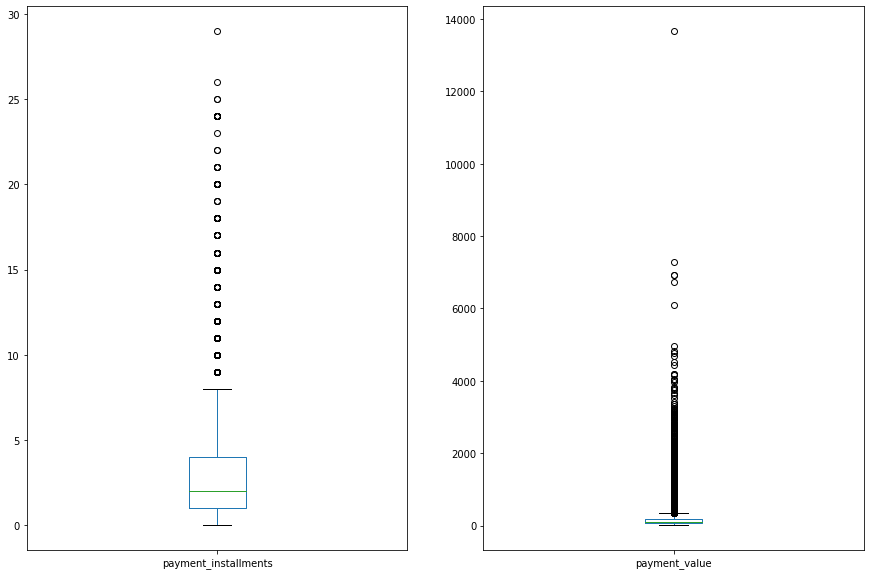

In [ ]:
numerical_column = ['payment_installments','payment_value']

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,10))
for i,el in enumerate(numerical_column):
    a = df_payments.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

in this case we can ignore the payment_installments, then let's check the botplot_max of payment_value

In [ ]:
pay_value = df_payments['payment_value']
Q1 = pay_value.quantile(0.25)
Q3 = pay_value.quantile(0.75)
IQR = Q3 - Q1
boxplot_max = Q3 + 1.5 * IQR
boxplot_max

349.41625

In [ ]:
c = df_payments[(df_payments['payment_value']>349.4)].count()
c

order_id                7866
payment_type            7866
payment_installments    7866
payment_value           7866
dtype: int64

There's 8060 data that greater than boxplot_max value, it's kind of too many value if we drop it all.

Based on the objective bussiness question, actually we can keep the outliers because the value of payment will not affect the results. However, lets assume the smaller outlier is noise.

Then we can only delete the biggest (far away from Max) outlier in payment_value and then let's assign the data is under 4000.



In [ ]:
df_payments_1 = df_payments.copy()
df_payments_1 = df_payments_1[(df_payments_1['payment_value']<4000)] 

### Combine dataset

In [ ]:
df_merged = df_orders_1.merge(df_customers, on='customer_id')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96470 entries, 0 to 96469
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96470 non-null  object        
 1   customer_id                    96470 non-null  object        
 2   order_purchase_timestamp       96470 non-null  datetime64[ns]
 3   order_delivered_customer_date  96470 non-null  datetime64[ns]
 4   customer_unique_id             96470 non-null  object        
 5   customer_city                  96470 non-null  object        
 6   customer_state                 96470 non-null  object        
dtypes: datetime64[ns](2), object(5)
memory usage: 5.9+ MB


In [ ]:
df = df_merged.merge(df_payments_1, on='order_id')
df

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_city,customer_state,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,voucher & credit_card,3,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,barreiras,BA,boleto,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,credit_card,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,credit_card,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,credit_card,1,28.62
...,...,...,...,...,...,...,...,...,...,...
96446,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-17 15:08:01,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,credit_card,3,85.08
96447,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-28 17:37:56,da62f9e57a76d978d02ab5362c509660,praia grande,SP,credit_card,3,195.00
96448,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-09-21 11:24:17,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,credit_card,5,271.01
96449,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-25 23:32:54,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,credit_card,4,441.16


# **EDA**

Exploratory data analysis:
- Descriptive statistic
- Num of orders per month
- Daily orders trend
- Precentage of orders per payment type
- Top 5 cities with the most orders
- Check correlation between payment_installments and payment_value

### Descriptive statistic

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96451 entries, 0 to 96450
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96451 non-null  object        
 1   customer_id                    96451 non-null  object        
 2   order_purchase_timestamp       96451 non-null  datetime64[ns]
 3   order_delivered_customer_date  96451 non-null  datetime64[ns]
 4   customer_unique_id             96451 non-null  object        
 5   customer_city                  96451 non-null  object        
 6   customer_state                 96451 non-null  object        
 7   payment_type                   96451 non-null  object        
 8   payment_installments           96451 non-null  int64         
 9   payment_value                  96451 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 8.1+ MB


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
desc_stat = df.describe()
desc_stat.loc['kurtosis'] = df.kurt()
desc_stat.loc['skewness'] = df.skew()
desc_stat.loc['variance'] = df.var()
desc_stat

,payment_installments,payment_value
count,96451.00,96451.00
mean,2.98,158.89
std,2.74,204.18
min,0.00,9.59
25%,1.00,61.87
50%,2.00,105.28
75%,4.00,176.23
max,26.00,3979.55
kurtosis,2.68,51.57
skewness,1.63,5.74


Lets see the data with 0 values in payment_installments

In [ ]:
df[df['payment_installments']==0]

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_city,customer_state,payment_type,payment_installments,payment_value
61849,744bade1fcf9ff3f31d860ace076d422,5e5794daaa13f73e2f1cdb4114529843,2018-04-22 11:34:42,2018-04-27 20:55:28,f54cea27c80dc09bfe07b1cf1e01b845,sao paulo,SP,credit_card,0,58.69
64366,1a57108394169c0b47d8f876acc9ba2d,48ebb06cf56dba9d009230cc751bb195,2018-05-15 16:25:14,2018-05-24 15:45:41,9925e1d7dff0d807355599dee04830ab,feira de santana,BA,credit_card,0,129.94


It's unlogical values, so we can delete it

In [ ]:
df_clear = df.copy()
df_clear = df_clear[df_clear['payment_installments']>0]
desc_stat2 = df_clear.describe()
desc_stat2.loc['kurtosis'] = df_clear.kurt()
desc_stat2.loc['skewness'] = df_clear.skew()
desc_stat2.loc['variance'] = df_clear.var()
desc_stat2

,payment_installments,payment_value
count,96449.00,96449.00
mean,2.98,158.89
std,2.74,204.18
min,1.00,9.59
25%,1.00,61.87
50%,2.00,105.28
75%,4.00,176.23
max,26.00,3979.55
kurtosis,2.68,51.57
skewness,1.63,5.74


In [ ]:
df_clear[['customer_city','customer_state','payment_type']].describe()

,customer_city,customer_state,payment_type
count,96449,96449,96449
unique,4085,27,5
top,sao paulo,SP,credit_card
freq,15042,40487,72102


In [ ]:
df_clear['payment_type'].value_counts()

credit_card              72102
boleto                   19187
voucher & credit_card     2181
voucher                   1498
debit_card                1481
Name: payment_type, dtype: int64

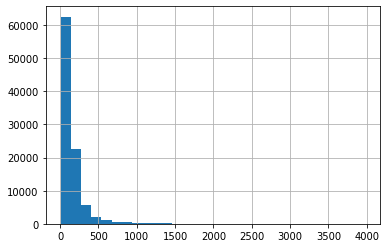

In [ ]:
df_clear['payment_value'].hist(bins=30)

**Insight**

- From total of 96449 delivered unique orders, 50% of payment value is pay 105.28$ with 50% of payment_installment in 2 times. 
- From the kurtosis of payment_value, which shows the number 51.57, it indicates that the peak distribution of the data is too high and skewness shows a positive number of 5.74 indicating that the positive skewness (tail long to the right), so have more payments in small value when compared to large ones.
- The highest payment installments is 24 times per order. 
- Order payment is only using 5 different types and mostly using credit_card
- Customer order mostly from sao paulo city and Spain country.

### Number of orders per month

In [ ]:
order_per_month = df_clear.groupby(df_clear['order_purchase_timestamp'].dt.to_period('M')).agg(num_of_orders = ('order_id','count')).reset_index()
order_per_month.head()

,order_purchase_timestamp,num_of_orders
0,2016-10,265
1,2016-12,1
2,2017-01,750
3,2017-02,1651
4,2017-03,2545


In [ ]:
order_per_month['month_year'] = order_per_month['order_purchase_timestamp'].dt.strftime('%b-%Y')
order_per_month

,order_purchase_timestamp,num_of_orders,month_year
0,2016-10,265,Oct-2016
1,2016-12,1,Dec-2016
2,2017-01,750,Jan-2017
3,2017-02,1651,Feb-2017
4,2017-03,2545,Mar-2017
5,2017-04,2300,Apr-2017
6,2017-05,3544,May-2017
7,2017-06,3135,Jun-2017
8,2017-07,3872,Jul-2017
9,2017-08,4193,Aug-2017


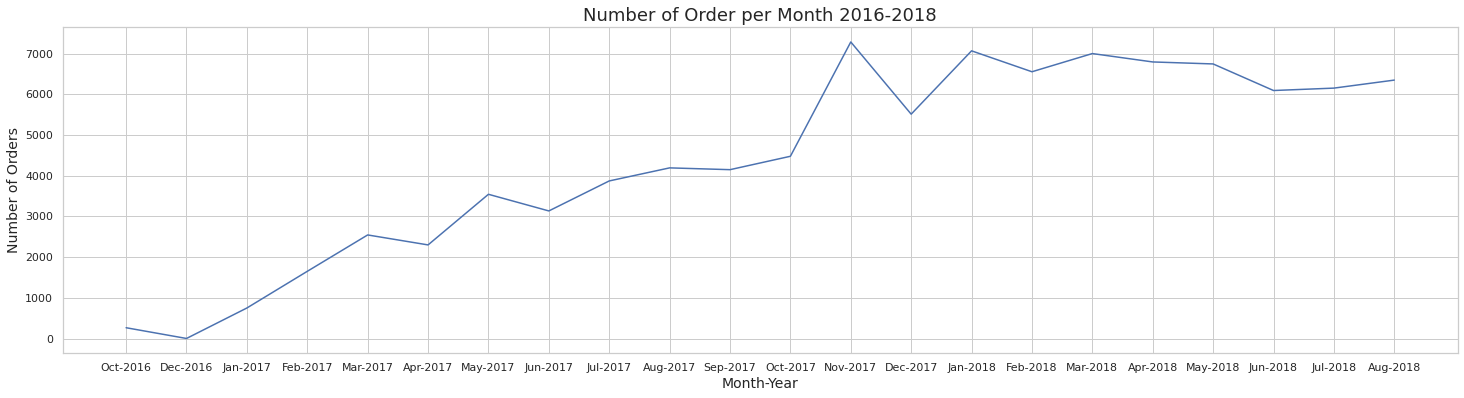

In [ ]:
plt.figure(figsize=(25,6))
sns.set_theme(style="whitegrid", font_scale=1)
order_per_month_viz = sns.lineplot(x = 'month_year', y = 'num_of_orders', data = order_per_month)
order_per_month_viz.set_title('Number of Order per Month 2016-2018',fontsize = 18)
order_per_month_viz.set_xlabel('Month-Year',fontsize = 14)
order_per_month_viz.set_ylabel('Number of Orders',fontsize = 14)
plt.show()

we can visualize order monthly per year

In [ ]:
def order_peryear (df,year):
  df_year = df[df['order_purchase_timestamp'].dt.year == year]
  df_year = df_year[['month_year','num_of_orders']]
  plt.figure(figsize=(15,6))
  sns.set_theme(style="darkgrid", font_scale=1)
  viz = sns.lineplot(x = 'month_year', y = 'num_of_orders', data = df_year)
  viz.set_title('Number of Order per Month in '+ str(year), fontsize = 17)
  viz.set_xlabel('Month',fontsize = 13)
  viz.set_ylabel('Number of Orders', fontsize = 13)
  return plt.show()

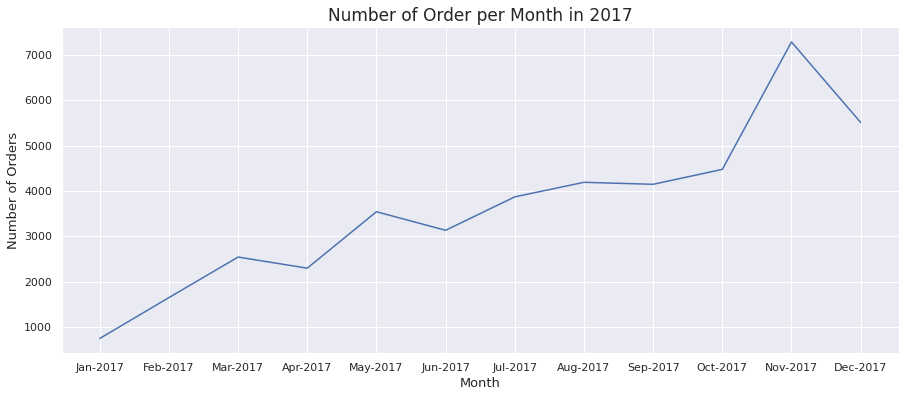

In [ ]:
orders_2017 = order_peryear(order_per_month,2017)

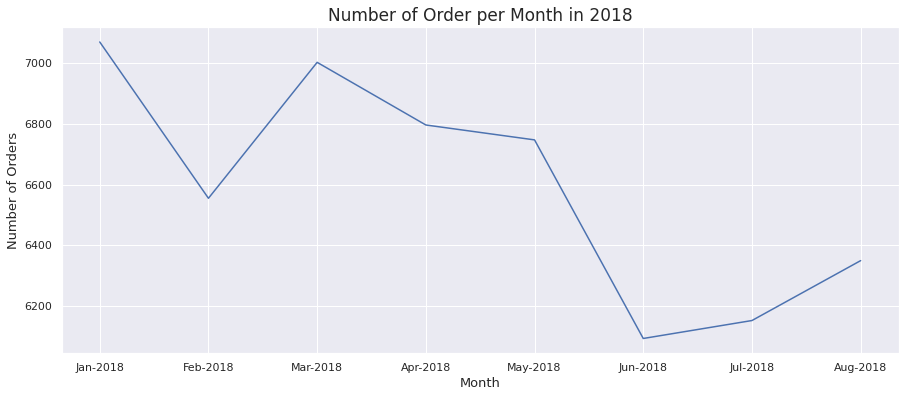

In [ ]:
orders_2018 = order_peryear(order_per_month,2018)

**Insight:**

1. The trend of total delivered orders per month in 0ct 2016 to Aug 2018 is tended to increase, where in between Oct 2017 to Jan 2018 there occured a sharp fluctuation. 
2. In 2017, total delivered orders grow continuously but it dropped in Dec 2017
3. In 2018, the trend experienced a very high decrease in total orders in Jun 2018

### Daily orders trend

In [ ]:
daily_orders = df_clear.groupby(df_clear['order_purchase_timestamp'].dt.dayofweek).agg(num_of_orders = ('order_id','count')).reset_index()
daily_orders

,order_purchase_timestamp,num_of_orders
0,0,15701
1,1,15497
2,2,15072
3,3,14319
4,4,13680
5,5,10552
6,6,11628


In [ ]:
d = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

for i in range(7):
  daily_orders['order_purchase_timestamp'] = daily_orders['order_purchase_timestamp'].replace(i,d[i])
daily_orders

,order_purchase_timestamp,num_of_orders
0,Monday,15701
1,Tuesday,15497
2,Wednesday,15072
3,Thursday,14319
4,Friday,13680
5,Saturday,10552
6,Sunday,11628


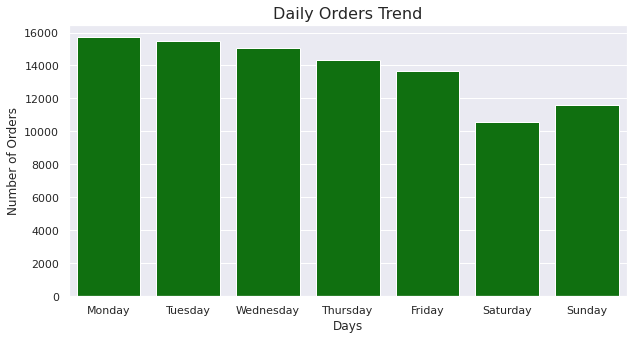

In [ ]:
plt.figure(figsize=(10,5))
daily_orders_viz = sns.barplot(x='order_purchase_timestamp', y='num_of_orders', data=daily_orders, color = 'green')
daily_orders_viz.set_xlabel('Days',fontsize = 12)
daily_orders_viz.set_ylabel('Number of Orders', fontsize = 12)
plt.title('Daily Orders Trend',fontsize = 16)
plt.show()

**Insight:**

The top 3 days that customers makes the most order are on Monday, Tuesday and Wednesday while Saturday is the least favourite


### Percentage of orders per payment type

In [ ]:
order_per_paytype = df_clear.groupby(df_clear['payment_type']).agg(num_of_orders = ('order_id','count')).reset_index()
order_per_paytype.sort_values(by='num_of_orders',ascending=False,inplace=True)
order_per_paytype

,payment_type,num_of_orders
1,credit_card,72102
0,boleto,19187
4,voucher & credit_card,2181
3,voucher,1498
2,debit_card,1481


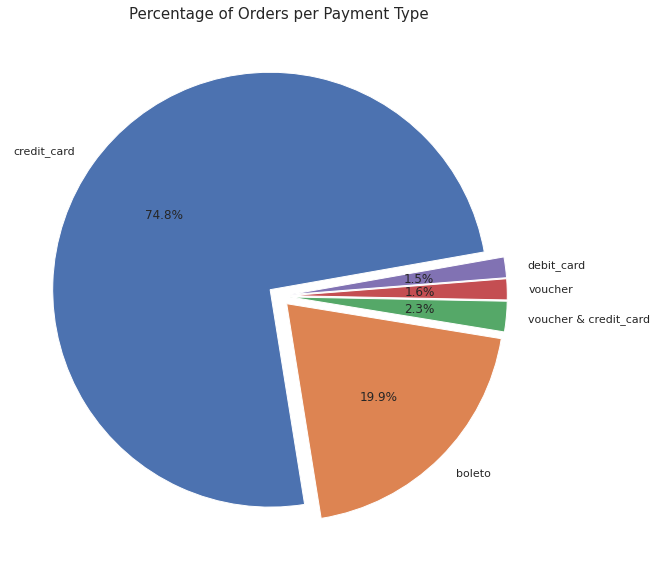

In [ ]:
p = order_per_paytype['payment_type']
plt.figure(figsize = (10,10))
plt.title('Percentage of Orders per Payment Type', fontsize = 15)
plt.pie(order_per_paytype['num_of_orders'], labels = p, autopct = '%0.1f%%',explode=[0.05,0.05,0.05,0.05,0.05], shadow=False, startangle=10)
plt.show()

**Insight :**

Credit_card payment type dominate the proportion of 74.8%, while the usage of debit card is the least proportion, it's only 1.5% out of 96449 success orders

### Top 5 cities with the most orders

In [ ]:
order_per_city = df_clear.groupby(df_clear['customer_city']).agg(num_of_orders = ('order_id','count')).reset_index()
order_per_city.sort_values(by='num_of_orders',ascending=False,inplace=True)

In [ ]:
order_per_city_5 = order_per_city.head(5).reset_index()
order_per_city_5

,index,customer_city,num_of_orders
0,3563,sao paulo,15042
1,3126,rio de janeiro,6600
2,449,belo horizonte,2697
3,553,brasilia,2070
4,1135,curitiba,1489


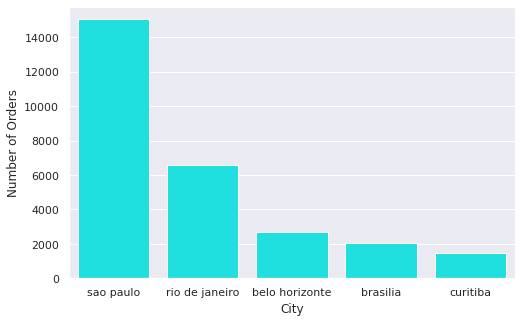

In [ ]:
plt.figure(figsize=(8,5))
order_per_city_viz = sns.barplot(x='customer_city', y='num_of_orders', data=order_per_city_5, color = 'cyan')
order_per_city_viz.set_xlabel('City',fontsize = 12)
order_per_city_viz.set_ylabel('Number of Orders', fontsize = 12)
plt.show()

Sao Paulo is a city that has the largest amount of order compared to another cities

### Check correlation between payment_installments and payment_value

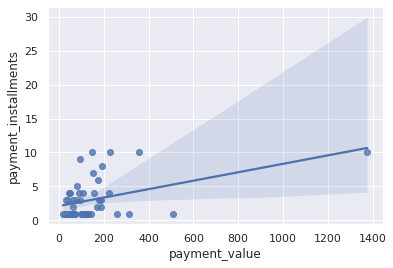

In [ ]:
sns.regplot('payment_value', 'payment_installments', data=df_clear[['payment_value', 'payment_installments']][:50])

In [ ]:
df_clear[['payment_value', 'payment_installments']].corr()

,payment_value,payment_installments
payment_value,1.00,0.34
payment_installments,0.34,1.00


Correlation between payment_installment and payment_value is 0.34, it's mean they have a weak positive correlation   

# **Cluster Analysis**

**Customer Segmentation**

In this case we use RFM (Recency, Frequency, Monetary) analysis for customer segmentation

Indicates:
  - data preparation
  - determine R,F,M score
  - standardize data
  - K-means clustering
    - elbow method
    - silhoutte analysis
  - create cluster
  - check agg for each cluster
  - conclusion

## Data Preparation

In [ ]:
df_cluster = df_clear.copy()
df_cluster

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_city,customer_state,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,voucher & credit_card,3,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,barreiras,BA,boleto,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,credit_card,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,credit_card,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,credit_card,1,28.62
...,...,...,...,...,...,...,...,...,...,...
96446,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-17 15:08:01,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,credit_card,3,85.08
96447,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-28 17:37:56,da62f9e57a76d978d02ab5362c509660,praia grande,SP,credit_card,3,195.00
96448,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-09-21 11:24:17,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,credit_card,5,271.01
96449,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-25 23:32:54,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,credit_card,4,441.16


## Determine R,F,M score

Recency (num days since the last purchase)

In [ ]:
Recen = df_cluster.groupby(df_cluster['customer_unique_id']).agg(last_purchase_date = ('order_purchase_timestamp','max')).reset_index()
Recen

,customer_unique_id,last_purchase_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
93325,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
93326,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
93327,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
93328,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [ ]:
Recen['Recency'] = (Recen['last_purchase_date'].max() - Recen['last_purchase_date']).dt.days
Recen

,customer_unique_id,last_purchase_date,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,114
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,536
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,320
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,287
...,...,...,...
93325,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,446
93326,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,261
93327,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,567
93328,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,118


Frequency (Num customers transaction times)

In [ ]:
Freq = df_cluster.groupby(df_cluster['customer_unique_id']).agg(Frequency = ('order_id','count')).reset_index()
Freq

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93325,fffcf5a5ff07b0908bd4e2dbc735a684,1
93326,fffea47cd6d3cc0a88bd621562a9d061,1
93327,ffff371b4d645b6ecea244b27531430a,1
93328,ffff5962728ec6157033ef9805bacc48,1


Monetary (Amount of customer payment value)

In [ ]:
Mone =  df_cluster.groupby(df_cluster['customer_unique_id']).agg(Monetary = ('payment_value','sum')).reset_index()
Mone

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
93325,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42
93326,fffea47cd6d3cc0a88bd621562a9d061,84.58
93327,ffff371b4d645b6ecea244b27531430a,112.46
93328,ffff5962728ec6157033ef9805bacc48,133.69


Combine RFM score into 1 dataset

In [ ]:
clus_merge = Recen.merge(Freq, on = 'customer_unique_id')
rfm = clus_merge.merge(Mone, on = 'customer_unique_id')
rfm.drop(columns= 'last_purchase_date', inplace=True)
rfm

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,536,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89
...,...,...,...,...
93325,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,2067.42
93326,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58
93327,ffff371b4d645b6ecea244b27531430a,567,1,112.46
93328,ffff5962728ec6157033ef9805bacc48,118,1,133.69


## Cek outlier

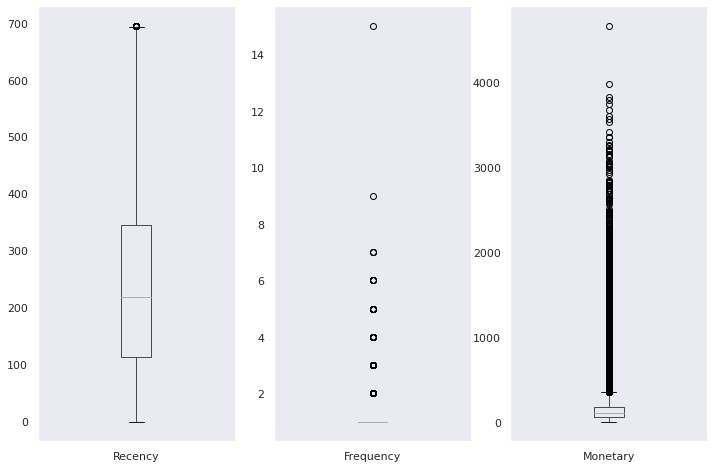

In [ ]:
d = ['Recency','Frequency','Monetary']
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12,8))
for i,el in enumerate(d):
    a = rfm.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
rfm.describe()

,Recency,Frequency,Monetary
count,93330.00,93330.00,93330.00
mean,236.94,1.03,164.20
std,152.57,0.21,211.08
min,0.00,1.00,9.59
25%,113.00,1.00,63.04
50%,218.00,1.00,107.78
75%,345.00,1.00,182.46
max,694.00,15.00,4655.91


In [ ]:
f = rfm[(rfm['Frequency']>=2)].count()
f

customer_unique_id    2800
Recency               2800
Frequency             2800
Monetary              2800
dtype: int64

## Standardize data

standardize data recency with minmax scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
data_norm = rfm.copy()
stsc = StandardScaler()
data_norm[['R_norm','F_norm']] = stsc.fit_transform(data_norm[['Recency','Frequency']])
data_norm

,customer_unique_id,Recency,Frequency,Monetary,R_norm,F_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,-0.83,-0.16
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,-0.81,-0.16
2,0000f46a3911fa3c0805444483337064,536,1,86.22,1.96,-0.16
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,0.54,-0.16
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,0.33,-0.16
...,...,...,...,...,...,...
93325,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,2067.42,1.37,-0.16
93326,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,0.16,-0.16
93327,ffff371b4d645b6ecea244b27531430a,567,1,112.46,2.16,-0.16
93328,ffff5962728ec6157033ef9805bacc48,118,1,133.69,-0.78,-0.16


In [ ]:
rfm_norm = data_norm.copy()
rbsc = RobustScaler()
rfm_norm[['M_norm']] = rbsc.fit_transform(rfm_norm[['Monetary']])
rfm_norm

,customer_unique_id,Recency,Frequency,Monetary,R_norm,F_norm,M_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,-0.83,-0.16,0.29
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,-0.81,-0.16,-0.67
2,0000f46a3911fa3c0805444483337064,536,1,86.22,1.96,-0.16,-0.18
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,0.54,-0.16,-0.54
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,0.33,-0.16,0.75
...,...,...,...,...,...,...,...
93325,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,2067.42,1.37,-0.16,16.41
93326,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,0.16,-0.16,-0.19
93327,ffff371b4d645b6ecea244b27531430a,567,1,112.46,2.16,-0.16,0.04
93328,ffff5962728ec6157033ef9805bacc48,118,1,133.69,-0.78,-0.16,0.22


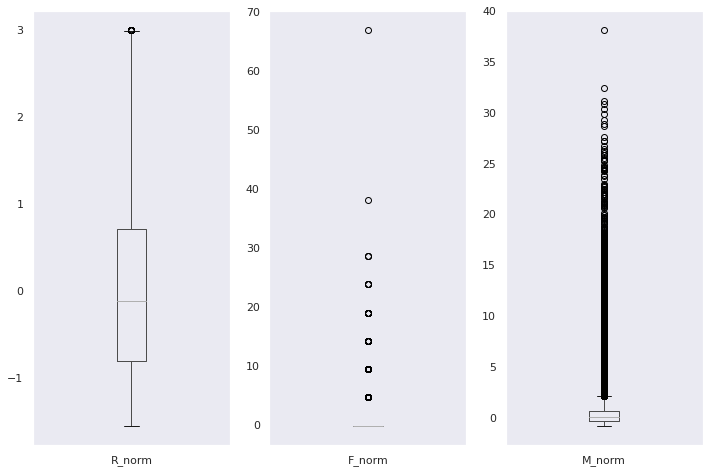

In [ ]:
b = ['R_norm','F_norm','M_norm']
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12,8))
for i,el in enumerate(b):
    a = rfm_norm.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
f = rfm_norm[(rfm_norm['M_norm']>15)].count()
f

customer_unique_id    227
Recency               227
Frequency             227
Monetary              227
R_norm                227
F_norm                227
M_norm                227
dtype: int64

In [ ]:
rfm_normal = rfm_norm[(rfm_norm['M_norm']<15)]
rfm_normal

,customer_unique_id,Recency,Frequency,Monetary,R_norm,F_norm,M_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,-0.83,-0.16,0.29
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,-0.81,-0.16,-0.67
2,0000f46a3911fa3c0805444483337064,536,1,86.22,1.96,-0.16,-0.18
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,0.54,-0.16,-0.54
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,0.33,-0.16,0.75
...,...,...,...,...,...,...,...
93324,fffbf87b7a1a6fa8b03f081c5f51a201,244,1,167.32,0.05,-0.16,0.50
93326,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,0.16,-0.16,-0.19
93327,ffff371b4d645b6ecea244b27531430a,567,1,112.46,2.16,-0.16,0.04
93328,ffff5962728ec6157033ef9805bacc48,118,1,133.69,-0.78,-0.16,0.22


## K-means clustering

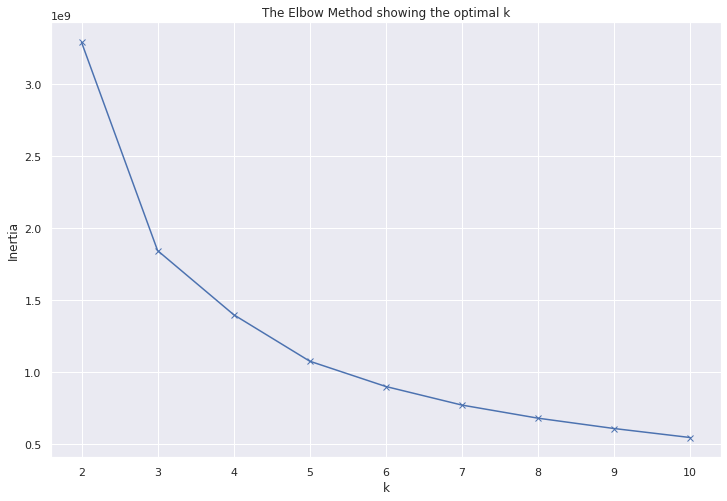

In [ ]:
rfm_df = rfm_normal[['Recency','Frequency','Monetary']]
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(rfm_df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(12,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Based on the elbow method, we use k=3

## Create cluster

In [ ]:
cluster_model = cluster.KMeans(n_clusters=3)
cluster_model.fit(rfm_df)
cluster_label = cluster_model.labels_
rfm_normal['cluster'] = cluster_label
rfm_normal.reset_index()

,index,customer_unique_id,Recency,Frequency,Monetary,R_norm,F_norm,M_norm,cluster
0,0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,-0.83,-0.16,0.29,0
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,-0.81,-0.16,-0.67,0
2,2,0000f46a3911fa3c0805444483337064,536,1,86.22,1.96,-0.16,-0.18,2
3,3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,0.54,-0.16,-0.54,2
4,4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,0.33,-0.16,0.75,2
...,...,...,...,...,...,...,...,...,...
93098,93324,fffbf87b7a1a6fa8b03f081c5f51a201,244,1,167.32,0.05,-0.16,0.50,0
93099,93326,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,0.16,-0.16,-0.19,2
93100,93327,ffff371b4d645b6ecea244b27531430a,567,1,112.46,2.16,-0.16,0.04,2
93101,93328,ffff5962728ec6157033ef9805bacc48,118,1,133.69,-0.78,-0.16,0.22,0


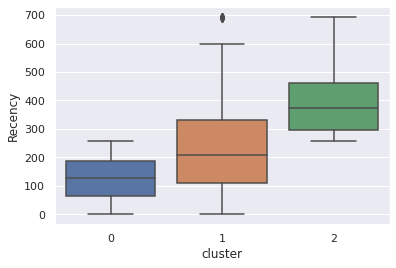

In [ ]:
sns.boxplot(x='cluster', y='Recency', data = rfm_normal)

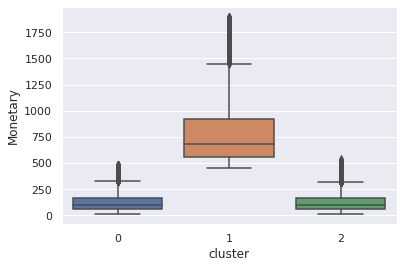

In [ ]:
sns.boxplot(x='cluster', y='Monetary', data = rfm_normal)

## Check agg for each cluster

In [ ]:
R_agg = rfm_normal.groupby(['cluster'])['Recency'].agg(['count','mean','median','max','min'])
R_agg

,count,mean,median,max,min
cluster,,,,,
0,50975,127.07,128.00,257,0
1,4401,230.65,210.00,693,0
2,37727,386.17,373.00,694,257


In [ ]:
F_agg = rfm_normal.groupby(['cluster'])['Frequency'].agg(['count','mean','median','max','min'])
F_agg

,count,mean,median,max,min
cluster,,,,,
0,50975,1.03,1.00,5,1
1,4401,1.13,1.00,15,1
2,37727,1.03,1.00,6,1


In [ ]:
M_agg = rfm_normal.groupby(['cluster'])['Monetary'].agg(['count','mean','median','max','min'])
M_agg

,count,mean,median,max,min
cluster,,,,,
0,50975,127.68,103.65,484.06,9.59
1,4401,791.11,685.40,1898.61,449.92
2,37727,127.05,101.25,534.98,10.07


## Conclusion
There are 3 cluster based on spending money behavior in time period, recent order and frequency of ordering
*   Cluster 0 = Customer who mostly order recently with average spending money 127$ 
*   Cluster 1 = Customer who spending money the most and have the highest frequently order

*   Cluster 2 = Customer who have the longest recent order with average spending money 127$





